In [25]:
import pandas as pd
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv('/workspaces/ML-Algorithm/data/processed/X_train.csv')
X_train.head(3)

,age,job,marital,education,default,contact,month,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.60,-1.00,1.00,-0.40,0.00,0.00,-0.67,-0.76,3.00,0.00,0.00,-0.91,-0.93,-0.70,-0.98,-0.71
1,-0.20,-0.50,1.00,0.60,0.00,-1.00,-0.67,-0.20,-0.50,0.00,0.00,0.00,0.27,0.86,0.00,0.00
2,0.80,0.00,0.00,-0.60,0.00,0.00,-0.33,-0.20,1.00,1.00,1.00,-0.87,0.33,0.32,-1.13,-1.55


In [3]:
X_test = pd.read_csv('/workspaces/ML-Algorithm/data/processed/X_test.csv')
X_test.head(3)

,age,job,marital,education,default,contact,month,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.53,-1.00,1.00,-0.40,0.00,0.00,-0.67,0.37,0.00,0.00,0.00,-0.91,-1.07,-0.70,-0.97,-0.71
1,0.33,1.50,0.00,0.60,0.00,0.00,1.00,-0.56,-0.50,1.00,1.00,-0.38,-0.74,-0.03,-0.20,0.04
2,-0.93,0.00,0.00,0.00,0.00,0.00,2.00,-0.01,-0.50,0.00,0.00,-0.91,-0.87,-0.84,-0.95,-0.71


In [4]:
y_train = pd.read_csv('/workspaces/ML-Algorithm/data/processed/y_train.csv')
y_train.head(3)

,y
0,0
1,0
2,0


In [5]:
y_test = pd.read_csv('/workspaces/ML-Algorithm/data/processed/y_test.csv')
y_test.head(3)

,y
0,0
1,0
2,0


In [6]:
reg = LazyRegressor()
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [25:53<00:00, 36.98s/it]   

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 32938, number of used features: 16
[LightGBM] [Info] Start training from score 0.113425


In [7]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.41       0.41  0.24        3.40
LGBMRegressor                                0.40       0.40  0.24        0.28
HistGradientBoostingRegressor                0.39       0.40  0.24        0.45
MLPRegressor                                 0.39       0.39  0.24        4.96
RandomForestRegressor                        0.38       0.38  0.25        8.53
XGBRegressor                                 0.36       0.36  0.25        0.29
ExtraTreesRegressor                          0.36       0.36  0.25        4.09
BaggingRegressor                             0.33       0.33  0.26        0.84
BayesianRidge                                0.31       0.32  0.26        0.14
ElasticNetCV                                 0.31       0.32  0.26        0.59
LassoCV                                      0.31   

In [26]:
model_GBR = GradientBoostingClassifier()

model_GBR.fit(X_train, y_train)

GradientBoostingClassifier()

In [27]:
y_pred = model_GBR.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [41]:
def get_metrics(yhat_test, y_test, yhat_train, y_train):
    # Calcula todas las métricas para el conjunto de entrenamiento
    accuracy_train = accuracy_score(y_train, yhat_train)
    precision_train = precision_score(y_train, yhat_train)
    recall_train = recall_score(y_train, yhat_train)
    f1_train = f1_score(y_train, yhat_train)
    
    # Calcula todas las métricas para el conjunto de prueba
    accuracy_test = accuracy_score(y_test, yhat_test)
    precision_test = precision_score(y_test, yhat_test)
    recall_test = recall_score(y_test, yhat_test)
    f1_test = f1_score(y_test, yhat_test)
    
    # Calcula la diferencia entre las métricas de entrenamiento y prueba
    accuracy_diff = accuracy_train - accuracy_test
    precision_diff = precision_train - precision_test
    recall_diff = recall_train - recall_test
    f1_diff = f1_train - f1_test
    
    # Crea el DataFrame con todas las métricas
    metrics_data = {
        'Accuracy': [accuracy_train, accuracy_test, accuracy_diff],
        'Precision': [precision_train, precision_test, precision_diff],
        'Recall': [recall_train, recall_test, recall_diff],
        'F1 Score': [f1_train, f1_test, f1_diff]
    }
    
    return pd.DataFrame(data=metrics_data, index=['Train set', 'Test set', 'Difference'])

In [42]:
yhat_train = model_GBR.predict(X_train)
yhat_test = model_GBR.predict(X_test)

In [43]:
get_metrics(yhat_test, y_test, yhat_train, y_train)

,Accuracy,Precision,Recall,F1 Score
Train set,0.92,0.69,0.57,0.63
Test set,0.92,0.65,0.55,0.59
Difference,0.00,0.05,0.02,0.03


Los resultados muestran lo siguiente:

- Accuracy (Exactitud): El modelo tiene una precisión del 92% tanto en el conjunto de entrenamiento como en el de prueba, lo que significa que clasifica correctamente el 92% de las muestras en ambos conjuntos. Esto indica que el modelo es capaz de predecir con precisión la clase de las muestras.

- Precision (Precisión): La precisión del modelo es del 69% en el conjunto de entrenamiento y del 65% en el conjunto de prueba. Esto significa que, de todas las instancias que el modelo clasificó como positivas, el 69% fueron realmente positivas en el conjunto de entrenamiento, y el 65% fueron realmente positivas en el conjunto de prueba. Una alta precisión indica que el modelo tiene una baja tasa de falsos positivos.

- Recall (Recuperación o Sensibilidad): El modelo tiene un recall del 57% en el conjunto de entrenamiento y del 55% en el conjunto de prueba. Esto significa que el modelo identifica correctamente el 57% de todas las instancias positivas en el conjunto de entrenamiento y el 55% en el conjunto de prueba. Una alta recuperación indica que el modelo tiene una baja tasa de falsos negativos.

- F1 Score: El puntaje F1 es una medida que combina la precisión y la recuperación del modelo en un solo valor. El modelo tiene un puntaje F1 del 63% en el conjunto de entrenamiento y del 59% en el conjunto de prueba. Un alto puntaje F1 indica un buen equilibrio entre precisión y recuperación.

En resumen, el modelo parece tener un buen rendimiento en general, ya que tiene altos valores de precisión, recuperación y F1 score en ambos conjuntos de datos.

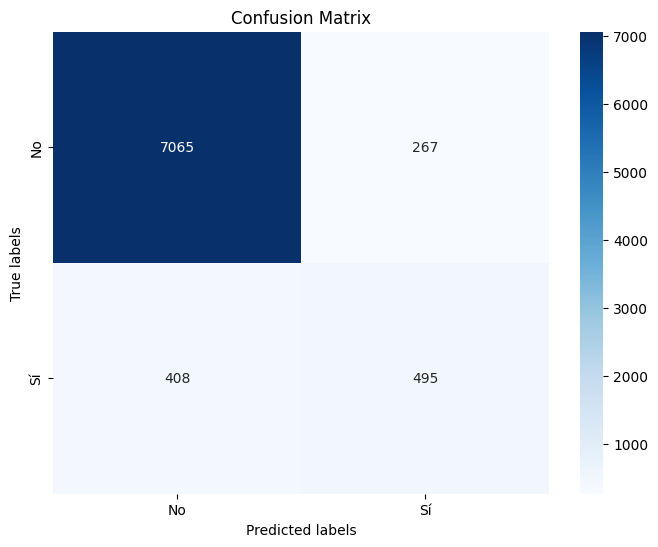

In [44]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()